In [8]:
import os
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Train Model

In [2]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    brightness_range = [0.8, 1.2],
    horizontal_flip = True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(
    rescale= 1./255
)

train_generator = train_datagen.flow_from_directory(
    '../dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_test_datagen.flow_from_directory(
    '../dataset/val',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'sparse'
)

test_generator = val_test_datagen.flow_from_directory(
    '../dataset/test',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'sparse',
    shuffle = False
)



Found 2651 images belonging to 4 classes.
Found 565 images belonging to 4 classes.
Found 569 images belonging to 4 classes.


In [3]:
model = models.Sequential([
    layers.Input(shape=(224, 224,3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

In [4]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                             
                                                                 
 global_av

In [5]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 15
)

Epoch 1/15
83/83 [==============================] - 76s 900ms/step - loss: 0.9555 - accuracy: 0.5356 - val_loss: 0.7785 - val_accuracy: 0.6319
Epoch 2/15
83/83 [==============================] - 76s 918ms/step - loss: 0.7558 - accuracy: 0.6680 - val_loss: 0.7613 - val_accuracy: 0.6743
Epoch 3/15
83/83 [==============================] - 78s 935ms/step - loss: 0.6946 - accuracy: 0.7152 - val_loss: 0.6882 - val_accuracy: 0.7115
Epoch 4/15
83/83 [==============================] - 75s 908ms/step - loss: 0.6682 - accuracy: 0.7393 - val_loss: 0.7742 - val_accuracy: 0.6956
Epoch 5/15
83/83 [==============================] - 76s 919ms/step - loss: 0.6443 - accuracy: 0.7450 - val_loss: 0.7449 - val_accuracy: 0.7345
Epoch 6/15
83/83 [==============================] - 73s 883ms/step - loss: 0.6443 - accuracy: 0.7446 - val_loss: 0.6240 - val_accuracy: 0.7381
Epoch 7/15
83/83 [==============================] - 74s 891ms/step - loss: 0.6435 - accuracy: 0.7510 - val_loss: 0.6988 - val_accuracy: 0.7504

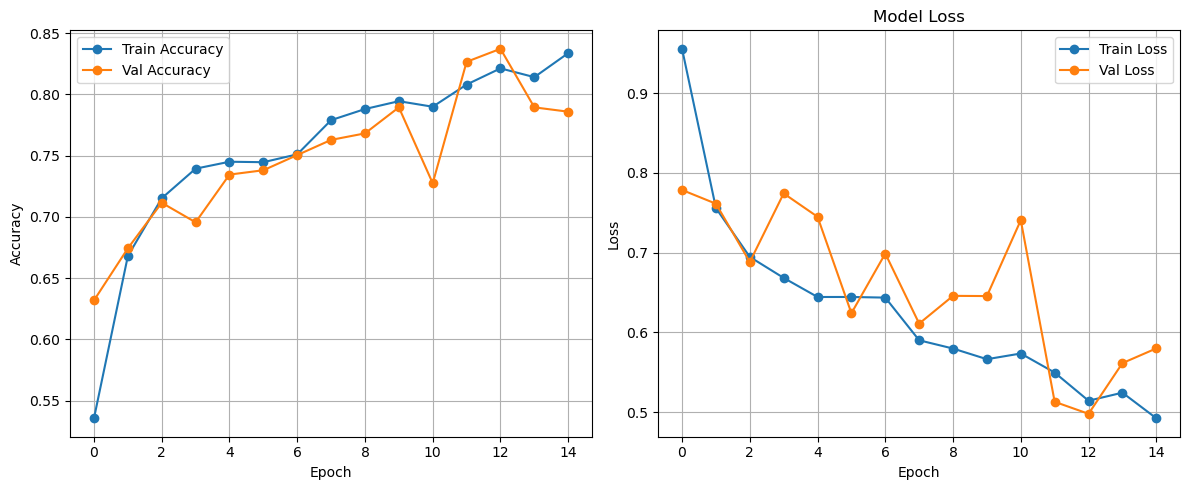

In [6]:
plt.figure(figsize=(12,5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label= 'Val Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

18/18 [==============================] - 5s 249ms/step - loss: 0.5031 - accuracy: 0.8172
Test Loss: 0.5030680894851685
Test Accuracy: 0.8172231912612915


In [13]:
# Get the true labels from the test generator
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

18/18 [==============================] - 4s 226ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.95      0.58      0.72       183
           2       0.86      0.96      0.91       194
           3       0.71      0.92      0.80       188

    accuracy                           0.82       569
   macro avg       0.63      0.61      0.61       569
weighted avg       0.84      0.82      0.81       569

Confusion Matrix:
[[  0   0   0   4]
 [  0 106  18  59]
 [  0   2 186   6]
 [  0   3  12 173]]


c:\Users\Stanley Chen\.conda\envs\comp_vision\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Stanley Chen\.conda\envs\comp_vision\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Stanley Chen\.conda\envs\comp_vision\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz